In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [3]:
# Load the dataset
df = pd.read_csv('/Users/suparna/Desktop/eda_data.csv')  # Update path as needed

In [5]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [7]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [9]:
df.shape

(742, 33)

In [11]:
df.drop(columns=['Competitors'], inplace=True)

In [13]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [15]:
# Drop rows where target is missing
df_model = df.dropna(subset=['avg_salary'])

In [17]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,...,190,0,0,0,1,0,na,senior,6162,3
738,738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,...,14,1,0,1,1,0,data engineer,senior,6130,3
739,739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,...,36,0,0,0,0,1,na,na,3078,0
740,740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,...,-1,0,0,0,0,1,manager,na,1642,0


In [19]:
# Separate features and target
X = df_model.drop(columns=['Unnamed: 0', 'Salary Estimate', 'Job Description', 'avg_salary'])
y = df_model['avg_salary']

In [21]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

In [23]:
# Preprocessing pipelines
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [25]:
# Final pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Rating', 'Founded',
                                                   'hourly',
                                                   'employer_provided',
                                                   'min_salary', 'max_salary',
                                                   'same_state', 'age',
                                                   'python_yn', 'R_yn', 'spark',
                                                   'aws', 'excel', 'desc_len',
                                                   'num_comp']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Job Title', 'Company Name',
                                                   'Location', 'Headquarters',
                                                   'Size', 'Type of ownership',
                                                   'Industry', 'Sector',
                                                   'Revenue', 'company_txt',
                                                   'job_state', 'job_simp',
                                                   'seniority'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [30]:
# Evaluate model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: ₹{rmse:.2f}K")

R² Score: 0.9982
RMSE: ₹1.72K


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor (SVR)': SVR()
}

In [35]:
# Store results
results = {}

# Train and evaluate each model
for name, reg in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[name] = {'R2 Score': r2, 'RMSE': rmse}
    print(f"{name} - R²: {r2:.4f}, RMSE: ₹{rmse:.2f}K")

Random Forest - R²: 0.9982, RMSE: ₹1.72K
Linear Regression - R²: 0.9997, RMSE: ₹0.74K
Decision Tree - R²: 0.9958, RMSE: ₹2.63K
Support Vector Regressor (SVR) - R²: -0.0198, RMSE: ₹40.83K


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [37]:
# Convert to DataFrame for display
results_df = pd.DataFrame(results).T.sort_values(by='R2 Score', ascending=False)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                                R2 Score       RMSE
Linear Regression               0.999668   0.736638
Random Forest                   0.998195   1.717510
Decision Tree                   0.995762   2.632081
Support Vector Regressor (SVR) -0.019842  40.828212


In [39]:
# Optional: Save best model
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Replace with your choice
])
best_model.fit(X_train, y_train)
joblib.dump(best_model, '/Users/suparna/Desktop/best___salary___model.pkl')
print("Best model saved as 'best_salary_model.pkl'")

Best model saved as 'best_salary_model.pkl'


In [41]:
import joblib

# Load the saved model
model = joblib.load('/Users/suparna/Desktop/best___salary___model.pkl')

# Example usage on new data (make sure new_data is a DataFrame with the same structure as X)
# new_data = pd.DataFrame({...})
# predicted_salary = model.predict(new_data)


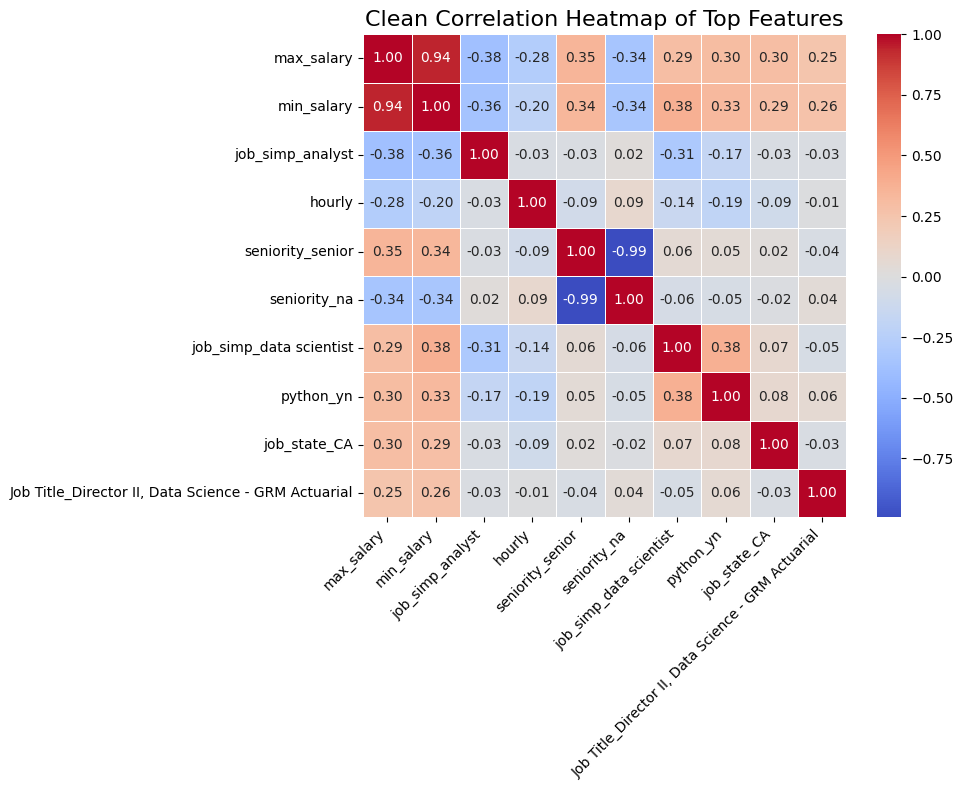

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Step 1: Copy data
df_corr = df_model.copy()

# Step 2: Drop unwanted columns
cols_to_drop = ['Unnamed: 0', 'Salary Estimate', 'Job Description', 'avg_salary']
X_corr = df_corr.drop(columns=cols_to_drop)

# Step 3: Split columns
categorical_cols = X_corr.select_dtypes(include='object').columns.tolist()
numerical_cols = X_corr.select_dtypes(include='number').columns.tolist()

# Step 4: One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_encoded = pd.DataFrame(
    encoder.fit_transform(X_corr[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_corr.index
)

# Step 5: Combine numeric + encoded categorical
X_encoded = pd.concat([X_corr[numerical_cols], X_cat_encoded], axis=1)

# Step 6: Add target column back
X_encoded['avg_salary'] = df_corr['avg_salary']

# Step 7: Correlation matrix
corr_matrix_all = X_encoded.corr()

# Step 8: Select top features
corr_with_salary = corr_matrix_all['avg_salary'].drop('avg_salary')

# Pick top 10 features (positive and negative both)
top_features = corr_with_salary.abs().sort_values(ascending=False).head(10).index

# Step 9: Create small clean correlation matrix
small_corr_matrix = corr_matrix_all.loc[top_features, top_features]

# Step 10: Plot clean heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(small_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True, square=True)
plt.title("Clean Correlation Heatmap of Top Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


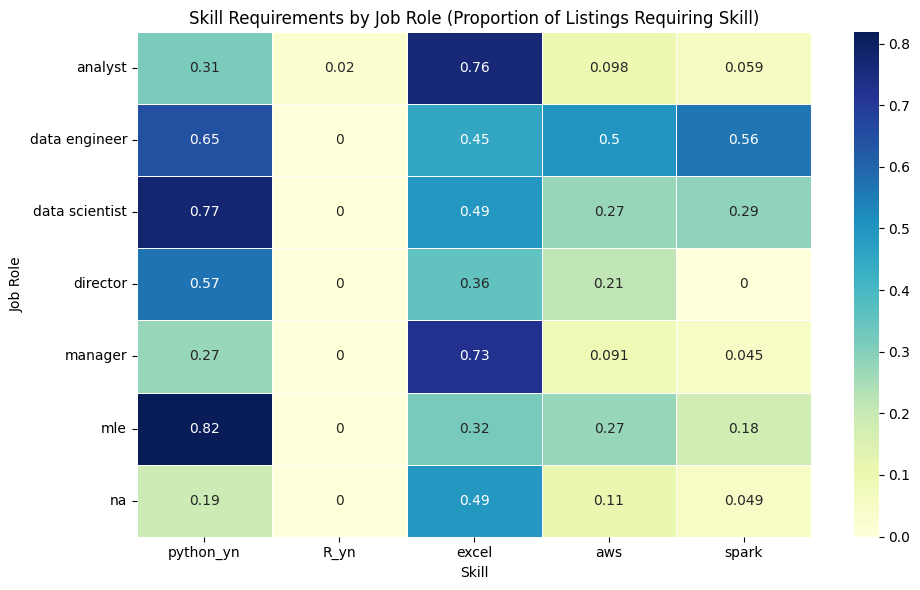

In [73]:
skill_columns = ['python_yn', 'R_yn', 'excel', 'aws', 'spark']
heat_data = df_model.groupby('job_simp')[skill_columns].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(heat_data, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Skill Requirements by Job Role (Proportion of Listings Requiring Skill)')
plt.xlabel('Skill')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()


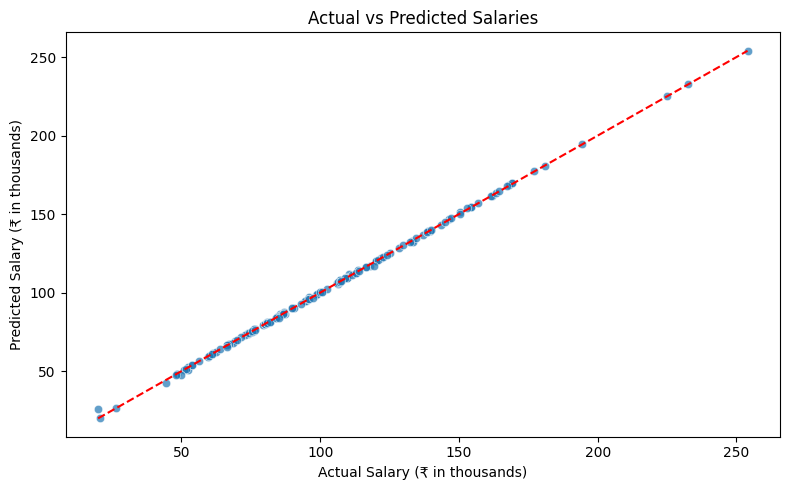

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Actual Salary (₹ in thousands)')
plt.ylabel('Predicted Salary (₹ in thousands)')
plt.tight_layout()
plt.show()


Top Features Positively Correlated with 'avg_salary':

max_salary           0.986862
min_salary           0.967765
python_yn            0.327796
spark                0.176559
aws                  0.171379
num_comp             0.093813
desc_len             0.078808
employer_provided    0.076287
age                  0.019655
Rating               0.013492
Name: avg_salary, dtype: float64

Top Features Negatively Correlated with 'avg_salary':

desc_len             0.078808
employer_provided    0.076287
age                  0.019655
Rating               0.013492
Founded             -0.015149
same_state          -0.034641
R_yn                -0.040000
Unnamed: 0          -0.041765
excel               -0.057252
hourly              -0.356082
Name: avg_salary, dtype: float64


/var/folders/7b/1d652zsn1lx9shnhyvxdyqf00000gn/T/ipykernel_29734/2853971919.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="Blues_d")


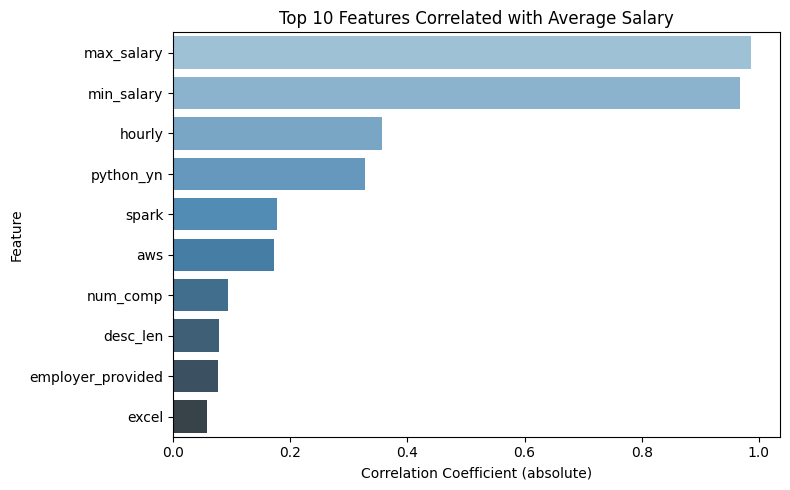

In [45]:

# Select only numeric columns
numeric_df = df_model.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Extract correlations with target variable 'avg_salary', sorted in descending order
salary_corr = corr_matrix['avg_salary'].drop('avg_salary').sort_values(ascending=False)

# Display top positively and negatively correlated features
print("Top Features Positively Correlated with 'avg_salary':\n")
print(salary_corr.head(10))

print("\nTop Features Negatively Correlated with 'avg_salary':\n")
print(salary_corr.tail(10))

# Optional: Bar plot of top 10 absolute correlations
top_corr = salary_corr.abs().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="Blues_d")
plt.title("Top 10 Features Correlated with Average Salary")
plt.xlabel("Correlation Coefficient (absolute)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


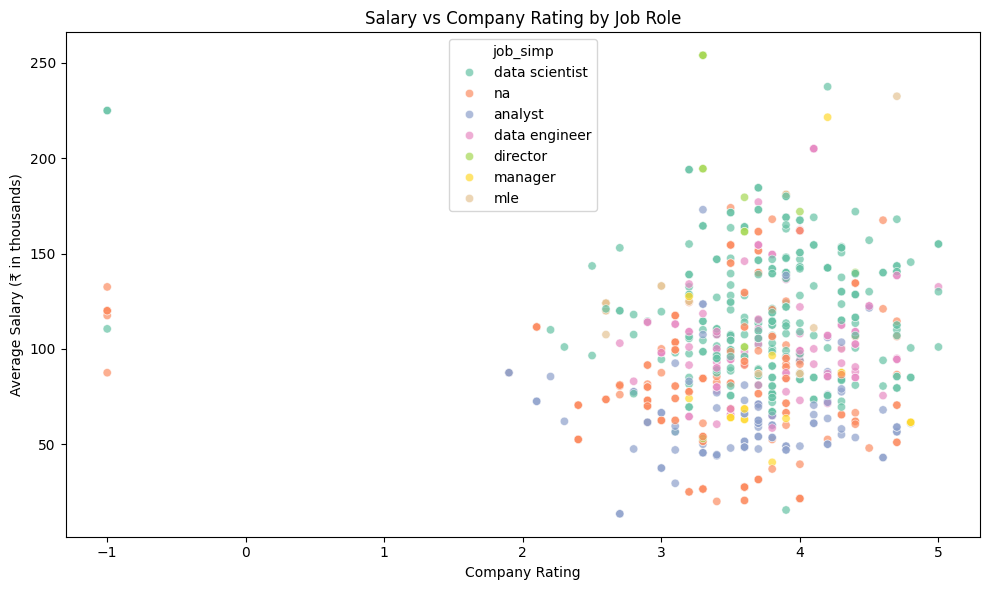

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x='Rating', y='avg_salary', hue='job_simp', alpha=0.7, palette='Set2')
plt.title('Salary vs Company Rating by Job Role')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary (₹ in thousands)')
plt.tight_layout()
plt.show()


/var/folders/7b/1d652zsn1lx9shnhyvxdyqf00000gn/T/ipykernel_29734/4072296090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_model, y='job_state', order=df_model['job_state'].value_counts().index, palette='cool')


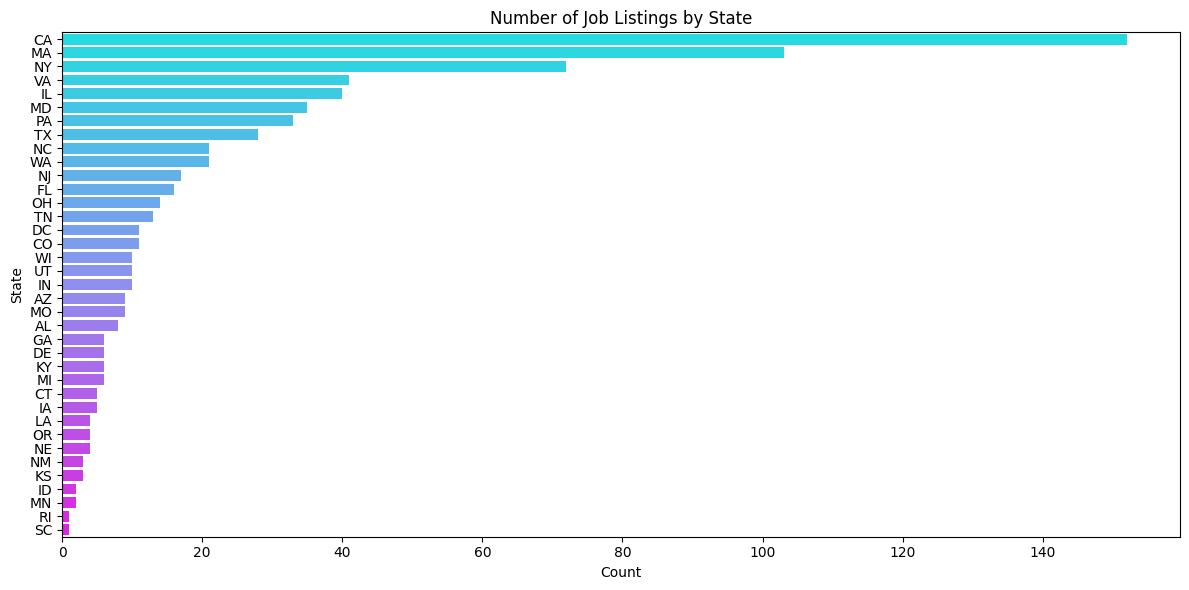

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_model, y='job_state', order=df_model['job_state'].value_counts().index, palette='cool')
plt.title('Number of Job Listings by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.tight_layout()
plt.show()


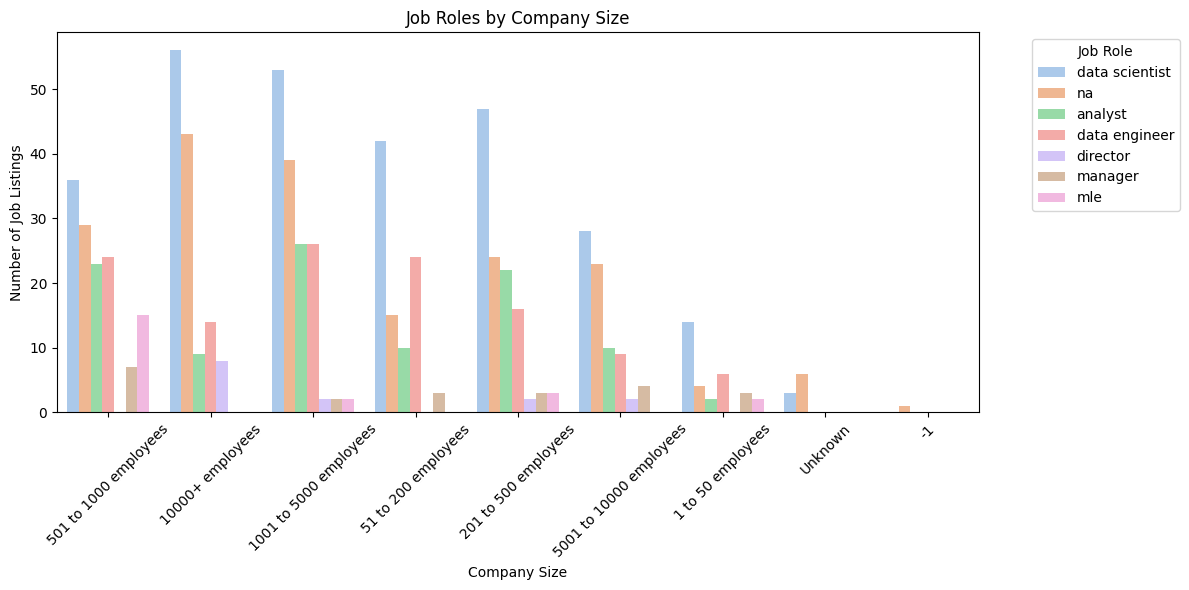

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_model, x='Size', hue='job_simp', palette='pastel')
plt.title('Job Roles by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45)
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/7b/1d652zsn1lx9shnhyvxdyqf00000gn/T/ipykernel_29734/2575402763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_model, x='Type of ownership', y='avg_salary', palette='Set3')


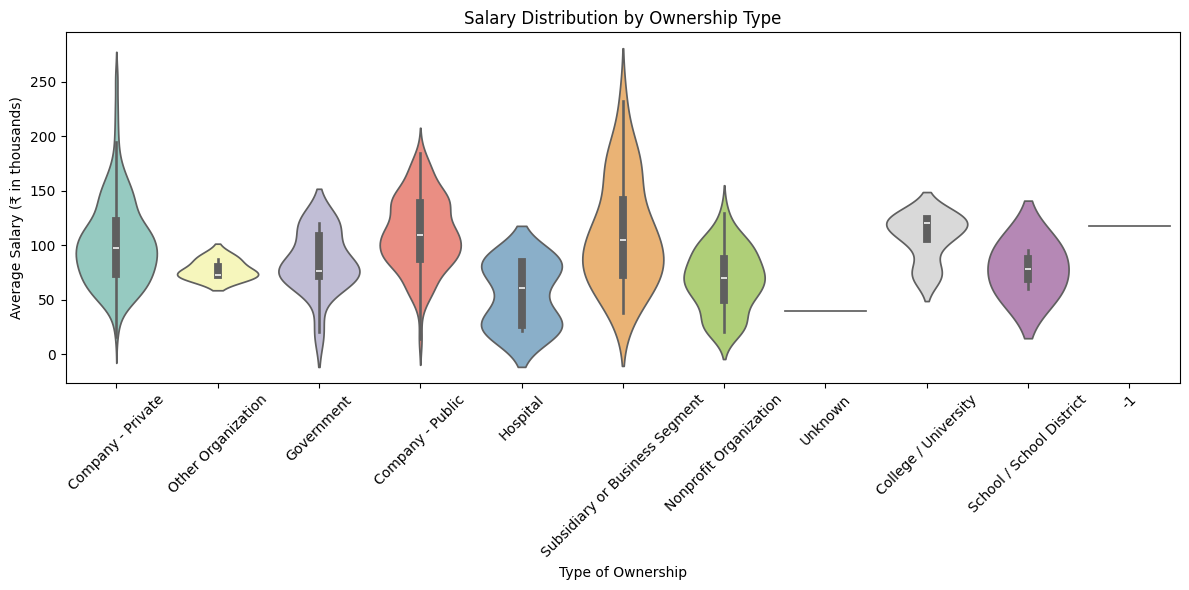

In [51]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_model, x='Type of ownership', y='avg_salary', palette='Set3')
plt.title('Salary Distribution by Ownership Type')
plt.xlabel('Type of Ownership')
plt.ylabel('Average Salary (₹ in thousands)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
